In [1]:
import gzip 

In [2]:
with gzip.open('/Users/NAMEERA/goodreads_books.json.gz','rt') as f:
    line = f.readline()

In [3]:
line

'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "ti

The json file has been streamed using the GZIP pathway. Through this method, the compressed json file that in originality is of 10 gigabytes is compressed to 1.9G. However, if the file is decompressed, the copies created while running the program would occupy all the memory available. Thus, using the gzip module would assist in streaming the file line by line. 

This file has to be imported into pandas to convert it into a readable format. As we already are aware that a json file is similar to that of the key-value pair in pandas, it would be easier to import. 

In [4]:
#import json
import json

#using.loads() to load the lines 
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [5]:
#parsing necessary features into pandas dictionary
#return only selected features from line
def parse_features(line):
    data = json.loads(line)
    return {
        "book_id":data['book_id'],
        "title":data['title_without_series'],
        "ratings":data['ratings_count'],
        "cover_image":data['image_url'],
        "url":data['url'],
        "description":data['description']
   
    }

In [6]:
#to append titles to dictionary from 
#filter titles with more than 10 ratings 
book_titles = []
with gzip.open('/Users/NAMEERA/goodreads_books.json.gz','rt') as f:
    while True:
        line = f.readline() #this line would execute a continuous loop on this data set and would not break until there is one constructed in the code
        if not line:
            break #if there exists no line further, break
        #to parse the chosen features/fields
        fields = parse_features(line)
        
        #creating trial and exceptions for the data required
        try:
            ratings = int(fields['ratings'])
        except ValueError:
            continue
        if ratings > 15:
            book_titles.append(fields)
            

In [7]:
#import line into pandas dataframe
import pandas as pd

titles = pd.DataFrame.from_dict(book_titles)

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   book_id      1308957 non-null  object
 1   title        1308957 non-null  object
 2   ratings      1308957 non-null  object
 3   cover_image  1308957 non-null  object
 4   url          1308957 non-null  object
 5   description  1308957 non-null  object
dtypes: object(6)
memory usage: 59.9+ MB


The dtypes of the features are of object. This would consequently bring in discrepancies. Hence converting the necessary features into right dtypes is adviced.

In [9]:
titles['ratings'] = pd.to_numeric(titles['ratings'])

In [10]:
titles.dtypes

book_id        object
title          object
ratings         int64
cover_image    object
url            object
description    object
dtype: object

In [11]:
titles

,book_id,title,ratings,cover_image,url,description
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ..."
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p..."
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo..."
...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he..."
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ..."
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ..."


Creating a search engine for books requires uniformity in the data presented. The titles consist of a mixture of upper, lower case, numeric and spatial connotations. This may mislead the program to believe that titles that technically are the same be treated as separate entries. 

In [12]:
titles['modified_title'] = titles['title'].str.replace("[^a-zA-Z0-9 ]","", regex=True)

In [13]:
titles['modified_title'] = titles['modified_title'].str.lower()

In [14]:
titles['modified_title'] = titles['modified_title'].str.replace("\s+", " ",regex=True)

In [15]:
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [16]:
#to check if there any title fields with 0 length
titles = titles[titles['modified_title'].str.len()>0]
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [17]:
#filtering titles with descriptions
titles = titles[titles['description'].str.len()>0]
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [18]:
#checking random book title and description
titles['modified_title'][786]
titles['description'][786]

"The enchanting story of a midwestern girl who escapes a family tragedy and is remade as a movie star during Hollywood's golden age.\nIn 1920, Elsa Emerson, the youngest and blondest of three sisters, is born in idyllic Door County, Wisconsin. Her family owns the Cherry County Playhouse, and more than anything, Elsa relishes appearing onstage, where she soaks up the approval of her father and the embrace of the audience. But when tragedy strikes her family, her acting becomes more than a child1s game of pretend.\nWhile still in her teens, Elsa marries and flees to Los Angeles. There she is discovered by Irving Green, one of the most powerful executives in Hollywood, who refashions her as a serious, exotic brunette and renames her Laura Lamont. Irving becomes Laura's great love; she becomes an Academy Award-winning actress--and a genuine movie star. Laura experiences all the glamour and extravagance of the heady pinnacle of stardom in the studio-system era, but ultimately her story is a

In [19]:
#Word count distribution for the description
#using lambda to count the number of words
titles['word_count']= titles['description'].apply(lambda x: len(str(x).split()))

<ipython-input-19-120c78ab6bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['word_count']= titles['description'].apply(lambda x: len(str(x).split()))


In [20]:
titles

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12,14
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever,104
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls,55
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8,164
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook,34
...,...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05,160
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts,45
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride,68
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection,24


In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Description word count'}, ylabel='Frequency'>

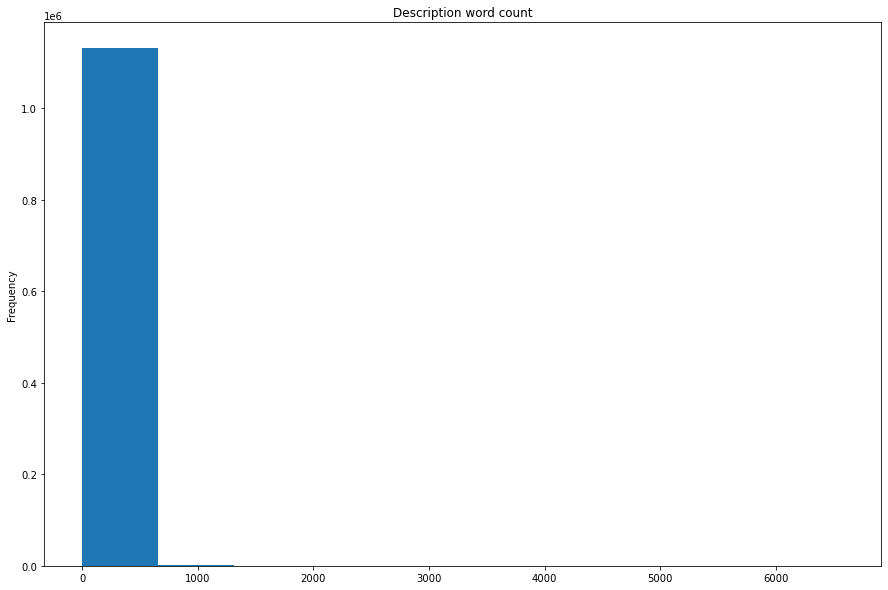

In [22]:
titles['word_count'].plot(kind='hist',bins=10,figsize=(15,10),title='Description word count')

In [23]:
titles['word_count'].value_counts()

121     6370
113     6298
110     6281
125     6281
99      6274
        ... 
1420       1
1409       1
1407       1
1395       1
1022       1
Name: word_count, Length: 1241, dtype: int64

The descriptions provided for over 50% of the books in goodreads have short descriptions. It ranges from 300-600 words approximately.

Although book descriptions can also be used as a factor for classification, book titles and ratings are the primary point of focus in this project. 

In [24]:
titles.to_json('book_titles.json')

# Feature Extraction for search engine

In [25]:
#import scikit modules
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

This feature extraction technique converts arbitrary texts and images into numbers for the computer to read and place in a frequency inverse matrix. This deals with the similarity measures that detects books or any product that matches with the one that concerns us.

In [26]:
tfidf =vectorizer.fit_transform(titles['modified_title'])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re

In [28]:
def search(query,vectorizer):
    processed = re.sub("[^a-zA-Z0-9]","",query.lower())
    query_vec = vectorizer.transform([query])
    similarity = cosine_similarity(query_vec,tfidf).flatten() #to print a 1d-array
    indices = np.argpartition(similarity,-10)[-10:]
    results = titles.iloc[indices]
    results = results.sort_values('ratings',ascending=False)
    return results

In [29]:
search('twilight',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
847114,11112731,"Twilight (Twilight, #1)",1813,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/11112731-t...,When Isabella Swan moves to the gloomy town of...,twilight twilight 1,95
555846,226729,Twilight,795,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/226729.Twi...,Returning to her hometown was the last thing L...,twilight,93
647609,2889742,Twilight,143,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2889742-tw...,HE WAS THE LAST PERSON SHE COULD TRUST...AND T...,twilight,172
629322,1629406,"Twilight (Twilight, #1)",111,https://images.gr-assets.com/books/1361373222m...,https://www.goodreads.com/book/show/1629406.Tw...,When Isabella Swan moves to the gloomy town of...,twilight twilight 1,95
1091355,1035885,"Twilight (Twilight, #1)",109,https://images.gr-assets.com/books/1348032914m...,https://www.goodreads.com/book/show/1035885.Tw...,When Isabella Swan moves to the gloomy town of...,twilight twilight 1,95
917351,3283211,"Twilight (Twilight, #1)",87,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/3283211-tw...,When isabella Swan moves to the gloomy town of...,twilight twilight 1,112
175455,7176054,"Twilight (Twilight, #1)",38,https://images.gr-assets.com/books/1258775485m...,https://www.goodreads.com/book/show/7176054-tw...,When Isabella Swan moves to the gloomy town of...,twilight twilight 1,95
494838,6365868,"דמדומים (Twilight, #1)",31,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6365868,dmdvmym hv hrshvn mbyn sdrt hsprym shkbshh mvt...,twilight 1,150
1106731,19542231,Twilight,24,https://images.gr-assets.com/books/1387323955m...,https://www.goodreads.com/book/show/19542231-t...,Raphael Lipkin is a man obsessed. He hears voi...,twilight,186
43738,21855294,Twilight,19,https://images.gr-assets.com/books/1419182112m...,https://www.goodreads.com/book/show/21855294-t...,"DC's wide-eyed science fiction heroes, most of...",twilight,107


In [30]:
search('pride and prejudice',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
1113097,1889,Pride and Prejudice,1690,https://images.gr-assets.com/books/1388202131m...,https://www.goodreads.com/book/show/1889.Pride...,"""VANITY, NOT LOVE, HAS BEEN MY FOLLY.""\nJane A...",pride and prejudice,112
177855,18300267,Pride and Prejudice,1161,https://images.gr-assets.com/books/1462899884m...,https://www.goodreads.com/book/show/18300267-p...,The traditional favorite Jane Austen novel--he...,pride and prejudice,84
1242555,10515068,Pride and Prejudice,974,https://images.gr-assets.com/books/1298125898m...,https://www.goodreads.com/book/show/10515068-p...,PRIDE AND PREJUDICE has delighted generations ...,pride and prejudice,68
746682,9807105,Pride and Prejudice,192,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/9807105-pr...,Librarian's Note: This is an alternate-cover e...,pride and prejudice,159
374543,336724,Pride and Prejudice,115,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/336724.Pri...,"In this historic romance, young Elizabeth Benn...",pride and prejudice,22
258562,10083363,Pride and Prejudice,81,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/10083363-p...,This is a beautiful new edition of Jane Austen...,pride and prejudice,20
1121257,12402637,Pride and Prejudice,69,https://images.gr-assets.com/books/1370805764m...,https://www.goodreads.com/book/show/12402637-p...,Pride and Prejudiceis the classic tale of the ...,pride and prejudice,148
665364,15765077,Pride and Prejudice,59,https://images.gr-assets.com/books/1370476137m...,https://www.goodreads.com/book/show/15765077-p...,"The provincial Bennet family, home to five unm...",pride and prejudice,207
305694,20982521,Pride and Prejudice,29,https://images.gr-assets.com/books/1393960949m...,https://www.goodreads.com/book/show/20982521-p...,It is a truth universally acknowledged that Ja...,pride and prejudice,111
1308743,26883542,Pride and Prejudice,17,https://images.gr-assets.com/books/1454881111m...,https://www.goodreads.com/book/show/26883542-p...,"In this historic romance, young Elizabeth Benn...",pride and prejudice,22


In [31]:
search('jane austen',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
815492,22675475,Jane and Austen,796,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/22675475-j...,[Jane and Austen: a Sweet Romance]\nMeet Jane-...,jane and austen,202
95326,155097,Jane Austen,121,https://images.gr-assets.com/books/1394516529m...,https://www.goodreads.com/book/show/155097.Jan...,Librarian note: a paperback edition with the s...,jane austen,216
506569,25011984,Jane and Austen,63,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/25011984-j...,[Jane and Austen: a Sweet Romance]\nMeet Jane-...,jane and austen,202
758743,15788377,Jane Austen: A Life,50,https://images.gr-assets.com/books/1344194359m...,https://www.goodreads.com/book/show/15788377-j...,Jane Austen is the celebrated biography by bes...,jane austen a life,311
941479,23341673,Jane Austen,47,https://images.gr-assets.com/books/1422811313m...,https://www.goodreads.com/book/show/23341673-j...,This beautifully illustrated biography follows...,jane austen,45
348037,768306,Jane Austen,44,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/768306.Jan...,Devoted fans and scholars of Jane Austen--as w...,jane austen,201
536801,1342609,Jane Austen,35,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/1342609.Ja...,Bestselling novelist with an enormous critical...,jane austen,20
1107629,1059502,Jane Austen,30,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/1059502.Ja...,Jane Austen sprang from the upper middle class...,jane austen,129
353165,4372633,Jane Austen,22,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/4372633-ja...,"Jane Austen, one of the best-loved novelists o...",jane austen,407
963705,34450330,Jane Austen,16,https://images.gr-assets.com/books/1488483061m...,https://www.goodreads.com/book/show/34450330-j...,"<>\nJane Austen, ormai prossima alla morte a s...",jane austen,65


In [32]:
search('the song of achilles',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
435078,11250317,The Song of Achilles,48003,https://images.gr-assets.com/books/1331154660m...,https://www.goodreads.com/book/show/11250317-t...,"Greece in the age of heroes. Patroclus, an awk...",the song of achilles,114
740904,13623848,The Song of Achilles,2789,https://images.gr-assets.com/books/1480119408m...,https://www.goodreads.com/book/show/13623848-t...,"Achilles, ""the best of all the Greeks,"" son of...",the song of achilles,144
396822,11887641,The Song of Achilles,1187,https://images.gr-assets.com/books/1355038739m...,https://www.goodreads.com/book/show/11887641-t...,The legend begins...\nGreece in the age of her...,the song of achilles,199
781309,13425442,The Song of Achilles,371,https://images.gr-assets.com/books/1331152644m...,https://www.goodreads.com/book/show/13425442-t...,The legend begins...\nGreece in the age of her...,the song of achilles,199
1222418,13617066,The Song of Achilles,252,https://images.gr-assets.com/books/1401295018m...,https://www.goodreads.com/book/show/13617066-t...,"Greece in the age of heroes. Patroclus, an awk...",the song of achilles,114
142184,12450053,The Song of Achilles,223,https://images.gr-assets.com/books/1331155536m...,https://www.goodreads.com/book/show/12450053-t...,"Greece in the age of heroes. Patroclus, an awk...",the song of achilles,114
911175,13537037,The Song of Achilles,188,https://images.gr-assets.com/books/1331556153m...,https://www.goodreads.com/book/show/13537037-t...,Enter the world of Homer's ancient Greece with...,the song of achilles,301
245187,12177656,The Song of Achilles,100,https://images.gr-assets.com/books/1331155342m...,https://www.goodreads.com/book/show/12177656-t...,"Greece in the age of Heroes. Patroclus, an awk...",the song of achilles,266
294213,21367647,The Song of Achilles,97,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/21367647-t...,"Greece in the age of heroes. Patroclus, an awk...",the song of achilles,114
356471,20634739,The Song of Achilles,33,https://images.gr-assets.com/books/1469768610m...,https://www.goodreads.com/book/show/20634739-t...,"Greece in the age of heroes. Patroclus, an awk...",the song of achilles,114


In [33]:
search('the prophet',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
292910,286,The Prophet,726,https://images.gr-assets.com/books/1403174434m...,https://www.goodreads.com/book/show/286.The_Pr...,"Kahlil Gibran's masterpiece, The Prophet, is o...",the prophet,211
512606,20395,The Prophet,209,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/20395.The_...,"Kahlil Gibran's masterpiece, The Prophet, is o...",the prophet,106
645623,19280145,The Prophet,123,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/19280145-t...,"Kahlil Gibran's masterpiece, The Prophet, is o...",the prophet,106
478468,30345361,The Prophet,104,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/30345361-t...,The Prophet is a book of 26 poetic essays writ...,the prophet,119
1157125,16131027,The Prophet,58,https://images.gr-assets.com/books/1377283150m...,https://www.goodreads.com/book/show/16131027-t...,A new thriller from international bestseller M...,the prophet,218
806808,26173207,The Prophet,43,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/26173207-t...,2015 Reprint of the 1923 Edition. Kahlil Gibra...,the prophet,112
1201848,25353332,The Prophet,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/25353332-t...,Alternate Cover Edition can be found . \nKahl...,the prophet,113
373770,13521512,The Prophet,27,https://images.gr-assets.com/books/1376881530m...,https://www.goodreads.com/book/show/13521512-t...,Adam Austin hasn't spoken to his brother in ye...,the prophet,196
971181,32859885,The Prophet,26,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/32859885-t...,"First published in the 1920's, THE PROPHET an ...",the prophet,77
1206537,23072217,The Prophet,21,https://images.gr-assets.com/books/1420177340m...,https://www.goodreads.com/book/show/23072217-t...,The Prophet is collection of prose poetry that...,the prophet,73


In [34]:
  search('.november 9',vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
831289,25111004,November 9,56228,https://images.gr-assets.com/books/1447138036m...,https://www.goodreads.com/book/show/25111004-n...,Beloved #1 New York Times bestselling author C...,november 9,114
1070238,11382391,"November (November, #1)",332,https://images.gr-assets.com/books/1458027334m...,https://www.goodreads.com/book/show/11382391-n...,**2016 Update** November is now available for ...,november november 1,113
440590,26083576,November 9,328,https://images.gr-assets.com/books/1447724644m...,https://www.goodreads.com/book/show/26083576-n...,"Fallon meets Ben, an aspiring novelist, the da...",november 9,113
625125,26050185,November 9,178,https://images.gr-assets.com/books/1447724566m...,https://www.goodreads.com/book/show/26050185-n...,"Fallon meets Ben, an aspiring novelist, the da...",november 9,113
396048,25785388,November 9,130,https://images.gr-assets.com/books/1456777570m...,https://www.goodreads.com/book/show/25785388-n...,Beloved #1 New York Timesbestselling author Co...,november 9,130
63013,19236595,November,49,https://images.gr-assets.com/books/1386345717m...,https://www.goodreads.com/book/show/19236595-n...,"November datang dan pergi,\ntetapi semua kenan...",november,19
588904,25388033,November 9,42,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/25388033-n...,This is a love story between a guy (me) and a ...,november 9,97
258068,32940145,November 9,37,https://images.gr-assets.com/books/1478814791m...,https://www.goodreads.com/book/show/32940145-n...,"""Kryminal konczy sie, gdy zabojca zostaje schw...",november 9,152
378562,32947103,9 November,34,https://images.gr-assets.com/books/1478917454m...,https://www.goodreads.com/book/show/32947103-9...,"Semua dimulai pada 9 November, pertemuan perta...",9 november,105
758316,10594830,November,31,https://images.gr-assets.com/books/1328847137m...,https://www.goodreads.com/book/show/10594830-n...,A brilliant new collection from the T.S. Eliot...,november,134
